In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [106]:
tabela = pd.read_csv("Produção de petróleo.csv", sep=';')
tabela['ANO'] = pd.to_datetime(tabela['ANO'], format='%Y')
tabela = tabela.replace({',': '.'}, regex=True)
tabela['PRODUÇÃO DE PETRÓLEO'] = tabela['PRODUÇÃO DE PETRÓLEO'].astype('float')
tabela.groupby(['REGIÃO GEOGRÁFICA','ANO','PRODUÇÃO DE PETRÓLEO']).sum().drop(['PAÍS'], axis=1).reset_index()



,REGIÃO GEOGRÁFICA,ANO,PRODUÇÃO DE PETRÓLEO
0,América do Norte,2012-01-01,2911.000000
1,América do Norte,2012-01-01,3740.000000
2,América do Norte,2012-01-01,8931.000000
3,América do Norte,2013-01-01,2882.024902
4,América do Norte,2013-01-01,4000.410965
...,...,...,...
545,Ásia-Pacífico,2021-01-01,435.179261
546,Ásia-Pacífico,2021-01-01,573.159092
547,Ásia-Pacífico,2021-01-01,691.552055
548,Ásia-Pacífico,2021-01-01,746.084147


In [110]:
ts = pd.Series(tabela['PRODUÇÃO DE PETRÓLEO'].values, index=tabela['ANO'])
modelo = ARIMA(ts, order=(5,1,0))  # (p, d, q) = (5, 1, 0) para ARIMA
resultado = modelo.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning

In [111]:
previsoes = resultado.predict(start=len(ts), end=len(ts)+6, typ='levels')

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


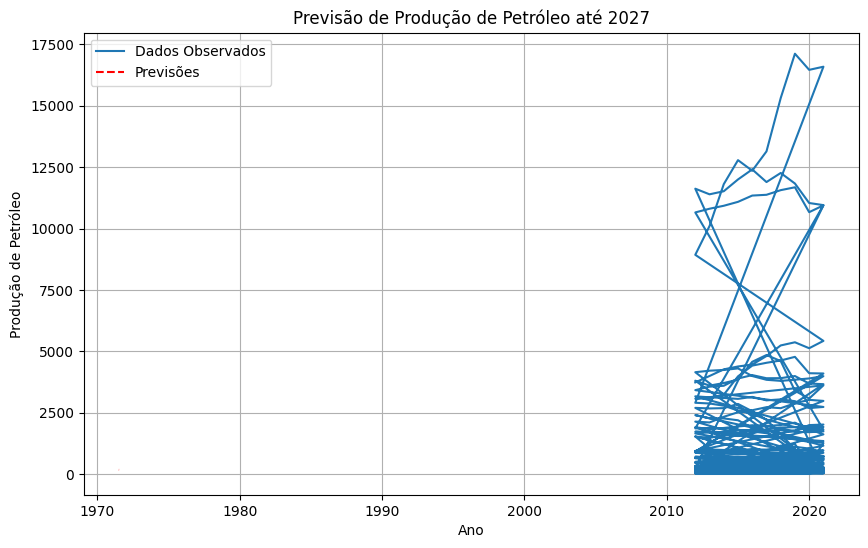

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Dados Observados')
plt.plot(previsoes, color='red', linestyle='--', label='Previsões')
plt.title('Previsão de Produção de Petróleo até 2027')
plt.xlabel('Ano')
plt.ylabel('Produção de Petróleo')
plt.legend()
plt.grid(True)
plt.show()